<div align="left">
<h4><a href="index.ipynb">RETURN TO INDEX</a></h4>
</div>
<div align="center">
<h1><a href="index.ipynb">DH3501: Advanced Social Networks</a><br/><br/><em>Class 4</em>: Introduction to Graph Theory</h1>
</div>

<div style="float:left">
<b>Western University</b><br/>
<b>Department of Modern Languages and Literatures</b><br/>
<b>Digital Humanities – DH 3501</b><br/>
<br/>
<b>Instructor</b>: David Brown<br/>
<b>E-mail</b>: <a href="mailto:dbrow52@uwo.ca">dbrow52@uwo.ca</a><br/>
<b>Office</b>: AHB 1R14<br/>
</div>
<div style="float:left">
<img style="width:200px; margin-left:100px" src="http://www.bsr.org/images/blog/networks.jpg" />
</div>

## So what is a graph, really?

Simply put: A **graph** is a way of **specifying relationships amongst a collection of objects**.

Graphs are **everywhere**...

* Social networks
* Physical networks
* Software dependency
* ...  

**Can yo u think of an example?**

In [1]:
# Config environment for code examples.
%matplotlib inline
import networkx as nx
import matplotlib as plt
plt.rcParams['figure.figsize'] = 12, 7

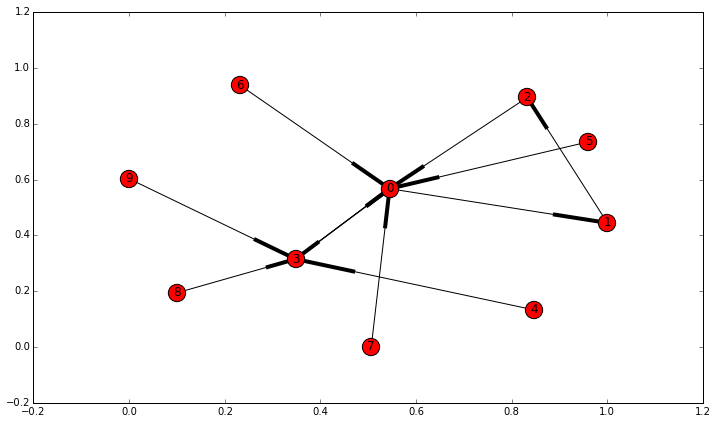

In [2]:
g = nx.scale_free_graph(10)
nx.draw_networkx(g)

## Materia prima: Nodes and edges

Graphs can be thought about as a collection of unique **nodes** and **edges**.

For example, in a **social network** a **node** is an indivdual.

* **Nodes can have types!**

An **edge** would be the **relationship** between two individuals, often containing **semantic information** about that relationship.

* Not all edges are created equal...**what's up with the Twitter graph?**
* Some edges are **directed!**

A **dyad** is the fundamental unit in social network analysis: 

* (node)-[rel]-(node)
* (noun)-[verb]-(noun)
* (john)-[likes]-(sally)  
  
**So if a dyad is two nodes and an edge, what's a triad?**

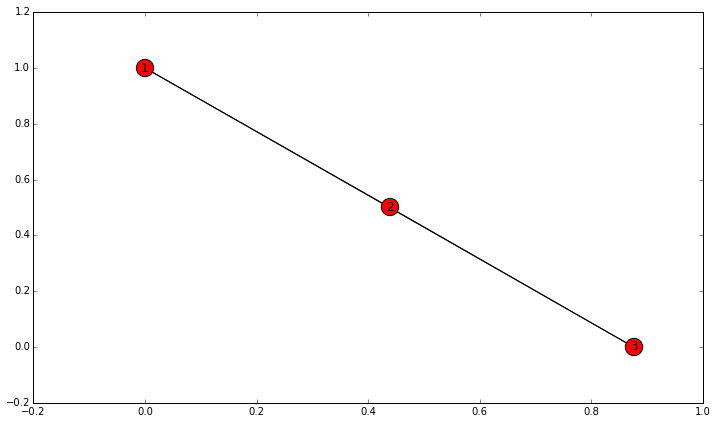

In [3]:
g = nx.Graph([(1, 2), (1, 3), (2, 3)]) # networkx.Graph accepts an edge list as an init param.
nx.draw_networkx(g)

## Coding challenge: Complete graph generator

**A triangle is a complete graph**.

* In a **complete graph** every node is connected to every other node in the graph.
* Another way to think about it is that all possible edges exist.
* Write a function, called **"complete_graph"** that accepts a param (num_nodes) and returns a complete networkx.Graph

**Hint**: if you don't use [itertools](https://docs.python.org/2/library/itertools.html) yet, it's time that you start.

In [4]:
def complete_graph(num_nodes):
    """
    :param num_nodes: number of nodes to include in the complete graph.
    :returns: networkx.Graph. a complete graph.
    """
    pass # Get rid of this pass statement.

## Different types of graphs

**Modes:** 1-mode vs. 2-mode/bimodal/bipartite vs. multimodal/multipartite

* Modes ~ node types
* **Types matter!** This topic will be addressed further on down the line.

**Directed** vs. undirected

* **"Digraph"** allows **directed edges**.

**Multigraph**

* "Multigraph" allows **self loops** and **multiple edges** between pairs of nodes. 
* "Multi-digraph" hmmmmm guess.

In [5]:
print(nx.Graph, nx.DiGraph, nx.MultiGraph, nx.MultiDiGraph)

(<class 'networkx.classes.graph.Graph'>, <class 'networkx.classes.digraph.DiGraph'>, <class 'networkx.classes.multigraph.MultiGraph'>, <class 'networkx.classes.multidigraph.MultiDiGraph'>)


## Graphs are mathematical models!

* **They model the the physical or logical links in real world networks.**

<img style="float: left" src="http://imgs.xkcd.com/comics/network.png" />

## So with that in mind, how do we model a graph in Python?

**Whoaaa there! Let's slow down and think about different ways of storing graph data.**

<img style="float: left" src="http://2.bp.blogspot.com/_C_aSpCK9jjY/S_3_GuGcKQI/AAAAAAAAAE8/LixHrEHghjY/s1600/Far+Side+Stimulus+Response.jpg" />

### Adjacency matrix

* This model uses a matrix to store edge information
* Adjacency matrices are good for calculations requiering linear algebra..
* But in a typically **sparse** network most of the matrix is storing zeros that signify the lack of an edge between two nodes.
* **Confused?** --- **Observe**:

In [6]:
g = nx.gnp_random_graph(10, 0.5) # Random graph generator.

In [7]:
nx.to_numpy_matrix(g)

matrix([[ 0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.],
        [ 1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.],
        [ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.],
        [ 0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.],
        [ 1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.],
        [ 0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.]])

### Edge list

* Just like it sounds - a list of each edge in the graph.
* Doesn't take up any extra-space, but...
* Access is slow! Even if you know the edge you want you have to iterate over the list to find it.

In [8]:
g.edges()

[(0, 8),
 (0, 2),
 (0, 3),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 7),
 (1, 9),
 (2, 4),
 (2, 9),
 (3, 7),
 (4, 8),
 (4, 6),
 (4, 7),
 (5, 8),
 (5, 9),
 (5, 6),
 (5, 7),
 (6, 7),
 (7, 8),
 (8, 9)]

### Adjacency list

**You read the chapters right? So what is an adjacency list?**

**Here's a hint:**

In [9]:
g.adj

{0: {2: {}, 3: {}, 8: {}},
 1: {2: {}, 3: {}, 4: {}, 5: {}, 7: {}, 9: {}},
 2: {0: {}, 1: {}, 4: {}, 9: {}},
 3: {0: {}, 1: {}, 7: {}},
 4: {1: {}, 2: {}, 6: {}, 7: {}, 8: {}},
 5: {1: {}, 6: {}, 7: {}, 8: {}, 9: {}},
 6: {4: {}, 5: {}, 7: {}},
 7: {1: {}, 3: {}, 4: {}, 5: {}, 6: {}, 8: {}},
 8: {0: {}, 4: {}, 5: {}, 7: {}, 9: {}},
 9: {1: {}, 2: {}, 5: {}, 8: {}}}

## So NetworkX uses adjacency lists to model networks?

**Yes, but there's more...**  

What about **node attributes?**

In [10]:
g.node # Dict containing node attributes.

{0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}}

**Hmmm...see all those empty dict objects?**

In [11]:
g.node[0]["type"] = "person"
g.node[0]["name"] = "ryu"

In [12]:
g.nodes(data=True)

[(0, {'name': 'ryu', 'type': 'person'}),
 (1, {}),
 (2, {}),
 (3, {}),
 (4, {}),
 (5, {}),
 (6, {}),
 (7, {}),
 (8, {}),
 (9, {})]

In [13]:
g.node[0]

{'name': 'ryu', 'type': 'person'}

## Now do you see? This is the core API for NetworkX!

**So that was node access, edge access is like whaaaa?**

In [14]:
# Well watch this...
g.adj[0]

{2: {}, 3: {}, 8: {}}

In [15]:
# And this...
g[0]

{2: {}, 3: {}, 8: {}}

In [16]:
# And this...
g.edge[0]

{2: {}, 3: {}, 8: {}}

**WARNING** Setting attributes on the edge API can be **risky** if you don't know what you are doing. We will discuss this in a **future challenge**.

## So this all seems a bit low-level right? If I wanted to manage dictionaries of dictionaries I would become a librarian...

**NetworkX** provides a wide variety of **data structures**, **methods**, and **functions** for **interacting with graphs**!  

* You will see examples in class, but you are expected to use your Python skills to learn the NetworkX library **on your own time**.
* Check out the [NetworkX docs here](http://networkx.github.io/documentation/networkx-1.9.1/).
* It also never hurts to take a look at the [source code on github](https://github.com/networkx/networkx).

## Ok, so how do we interact with graphs on a higher level?

One of the fundamental concepts in graph theory is the **traversal**.

* It is the natural way to interact with graph data...it **hops from node to node across edges**.
* Traversals allow us to **search the graph**, **find pathways between pairs of nodes**, and thereby **calculate important graph metrics**.
* There are different types of traversals:
  - Breadth-first traversals vs. depth-first traversals

### Depth-first search

<img="Depth-first-tree.svg" />

<img style="float: left" src="img/Depth-first-tree.svg">

### Breadth-first search

<img style="float: left" src="img/Breadth-first-tree.svg">

## Or in NetworkX

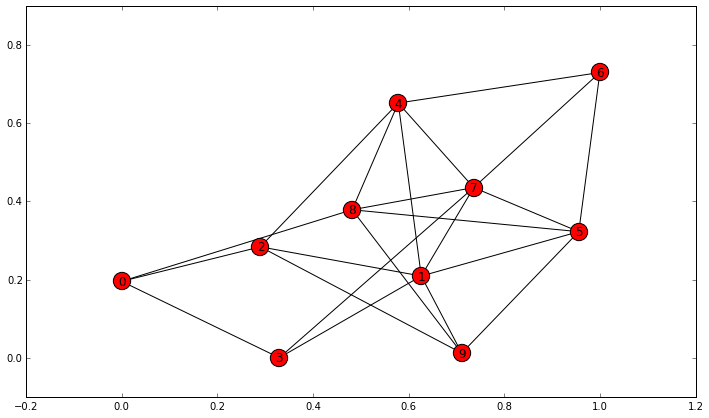

In [17]:
# This is the starting graph.
nx.draw_networkx(g)

In [18]:
depth_first_traversal = list(nx.dfs_edges(g, 3))
print(depth_first_traversal)

[(3, 0), (0, 8), (8, 9), (9, 1), (1, 2), (2, 4), (4, 6), (6, 5), (5, 7)]


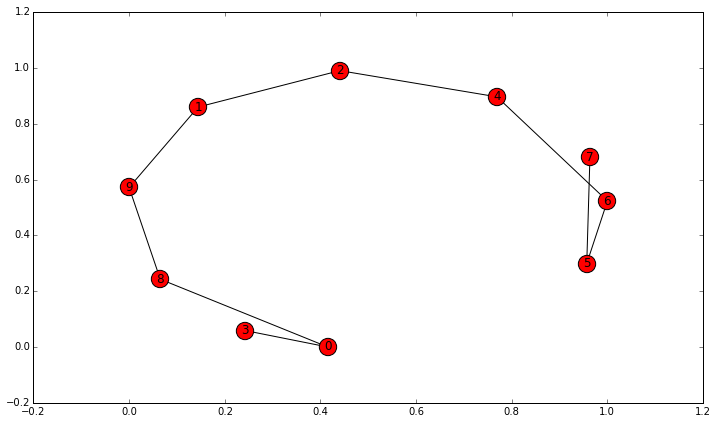

In [19]:
nx.draw_networkx(nx.Graph(depth_first_traversal))

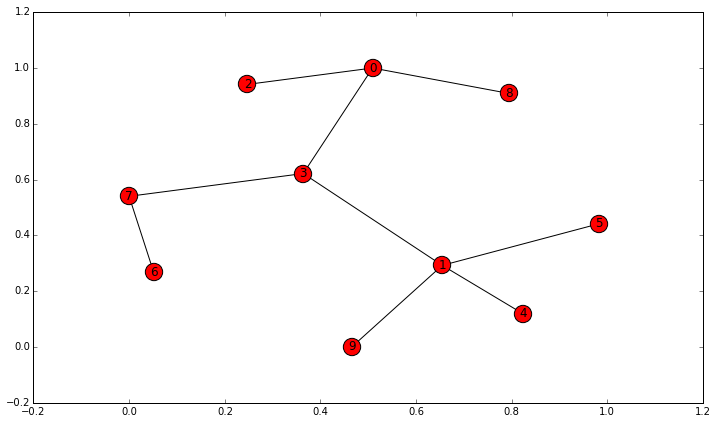

In [20]:
breadth_first_traversal = list(nx.bfs_edges(g, 3))
nx.draw_networkx(nx.Graph(breadth_first_traversal))

## **Whoa! Those are completely different traversal patterns. Can we explain why?**

<img style="float: left" src="http://i.guim.co.uk/static/w-620/h--/q-95/sys-images/Film/Pix/pictures/2009/5/8/1241793515016/Keanu-Reeves-in-Bill-and--001.jpg" />

**First look back to the original graph, and think about the implementation of a depth-first vs. breadth-first search.**

## Paths and distance

The dfs_edges and bfs_edges functions return a list of edges representing the walk of the traversal.  

* A **walk** is a sequence of nodes in which each node is connected by an edge.
* A **path** is a walk that is open and simple, having no node visited twice.
* A **cycle** is a walk that closed and simple, starting and finishing on the source node with no other node visited twice.
* A **walk** may be:
  - **Open** like a path.
  - **Closed** containing cycles.
* **Distance** can simply be defined as the number of edges traversed in a walk.
  - The shortest path between nodes is used in many calculations, as we will see next class.
  - One is diameter, a measure obtained by finding the shortest path between every pair of nodes in the graph, and choosing the longest.

## What if the all the nodes aren't connected to one another?

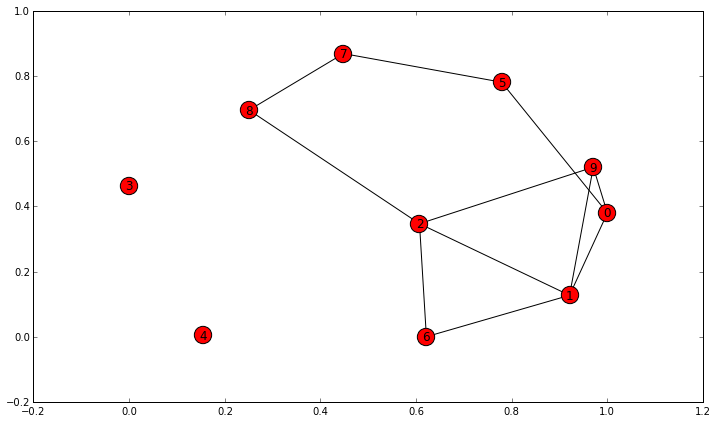

In [21]:
g = nx.gnp_random_graph(10, 0.2)
nx.draw_networkx(g)

## Not all graphs are connected!

A graph is connected if for **every pair of nodes there is a path between them**.  

* Graphs can have **multiple, disconnected components**.
  - A component is a subset of nodes such that every node in the subset has a path to every other node and if it is not part of some larger set with the property that every node can reach every other.

* A **giant component** is a component the contains a signifigant fraction of all nodes in the network.

* It is highly unlikely that more than one giant component exist.
  - **Why is this?**
  - **Why did E and K reference Jared Diamond's Guns, Germs, and Steel here?**

## Phew, that's enough theory for the day...time for the coding challenge!

Write a function **"find_neighbors"** that accepts the parameters (graph, node, distance) where **graph is an networkx.Graph**, **node is the start node** and **distance is the number of steps to walk**, that walks the graph, starting at the start node, to a specified distance away from the start node returning all of the neighbors found on the walk as a set. For example, if I call:

```python
find_neighbors(graph, "johnny", 2)
```

It will return all of johnny's neighbors at a distance of two, meaning the neighbors of his neighbors (the friends of his friends). 

**THIS IS A HARD CHALLENGE WITH MULTIPLE VALID SOLUTIONS. GOOD LUCK!!!**

In [22]:
# Remember
g = nx.gnp_random_graph(10, 0.5)
g[0] # Returns edges (neighbors).

{1: {}, 2: {}, 3: {}, 7: {}, 9: {}}

In [23]:
g.neighbors(0) # Also returns neighbors.

[1, 2, 3, 9, 7]

In [24]:
set(g[0]) # Returns a set of neighbors.

{1, 2, 3, 7, 9}

In [25]:
# Here's a template:
def find_neighbors(graph, node, distance):
    """
    :param graph: networkx.Graph
    :param node: a node in the graph.
    :param distance: an integer specifying the max distance of the walk.
    :returns: A set of neighbors returned by the walk.
    """
    pass # Get rid of this pass statement.